In [1]:
from scipy.stats import uniform, gamma, expon, probplot, norm
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import timeit

## Zadanie 1a

In [31]:
X_vals = np.array([1, 2, 3, 4, 5])
P_X = np.array([0.11, 0.12, 0.27, 0.19, 0.31])



def discrete_acceptance_rejection(X_vals, P_X, n):
    P_Y = 1/len(X_vals)
    c = np.max(P_X / P_Y)

    samples = []
    while len(samples) < n:
        y = np.random.choice(X_vals)
        U = uniform.rvs(0, 1)
        i = np.where(X_vals == y)
        if U <= P_X[i] / (c*P_Y):
            samples.append(y)
    return samples

n = 1000

samples = discrete_acceptance_rejection(X_vals, P_X, n)
print(samples)

[2, 5, 5, 3, 1, 4, 3, 1, 3, 4, 3, 1, 5, 3, 4, 3, 2, 3, 5, 5, 3, 4, 3, 5, 4, 1, 3, 4, 5, 2, 4, 5, 5, 3, 1, 1, 3, 1, 3, 3, 4, 5, 1, 5, 3, 5, 5, 2, 3, 3, 4, 3, 5, 5, 4, 4, 4, 3, 3, 5, 3, 5, 5, 4, 4, 3, 3, 2, 3, 3, 2, 5, 3, 1, 3, 3, 4, 5, 4, 2, 5, 5, 3, 3, 4, 1, 2, 5, 2, 1, 3, 1, 4, 5, 5, 3, 5, 3, 5, 4, 5, 3, 1, 5, 5, 5, 3, 5, 3, 5, 2, 1, 3, 4, 2, 4, 1, 2, 5, 4, 3, 3, 5, 5, 2, 2, 1, 4, 3, 3, 1, 1, 5, 2, 3, 2, 5, 5, 3, 4, 5, 4, 5, 1, 5, 1, 5, 4, 3, 3, 5, 1, 2, 2, 3, 4, 5, 4, 2, 5, 3, 5, 4, 5, 1, 5, 5, 3, 2, 5, 4, 5, 3, 3, 5, 4, 4, 4, 3, 2, 3, 5, 3, 5, 1, 1, 4, 3, 2, 4, 1, 3, 2, 3, 1, 5, 3, 2, 2, 2, 4, 3, 1, 5, 3, 2, 3, 5, 2, 3, 5, 3, 5, 3, 5, 5, 2, 4, 4, 4, 3, 4, 1, 2, 4, 5, 3, 3, 3, 4, 3, 4, 5, 5, 2, 4, 4, 4, 1, 3, 4, 3, 1, 4, 2, 4, 3, 5, 3, 3, 3, 5, 5, 3, 3, 3, 4, 5, 3, 5, 5, 4, 5, 2, 2, 2, 3, 5, 4, 2, 4, 3, 1, 5, 3, 5, 5, 4, 3, 5, 5, 3, 5, 3, 3, 4, 4, 4, 2, 4, 2, 1, 5, 5, 3, 5, 3, 4, 5, 3, 5, 3, 5, 2, 5, 4, 2, 5, 3, 3, 3, 2, 3, 5, 5, 1, 2, 3, 5, 5, 3, 4, 5, 3, 1, 5, 4, 3, 3, 2, 4, 1, 4, 

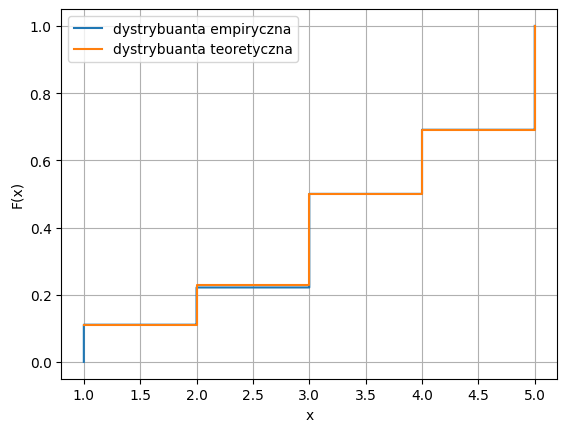

In [68]:
#Dystrybuanta empiryczna vs teoretyczna
ecdf = ECDF(samples)
plt.step(ecdf.x, ecdf.y, label='dystrybuanta empiryczna')
plt.step(X_vals, np.cumsum(P_X), where='post', label='dystrybuanta teoretyczna')
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid()
plt.legend()

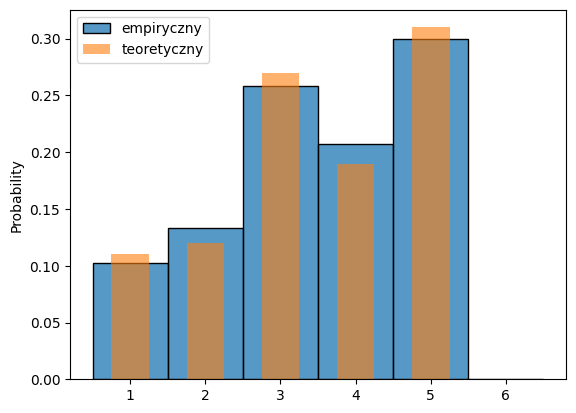

In [38]:
#Histogram rozkładu
n = 1000
samples = discrete_acceptance_rejection(X_vals, P_X, n)
sns.histplot(samples, bins=np.arange(0.5, 6.6, 1), stat="probability", label='empiryczny')
plt.bar(X_vals, P_X, alpha= 0.6, width=0.5, label='teoretyczny')
plt.legend()

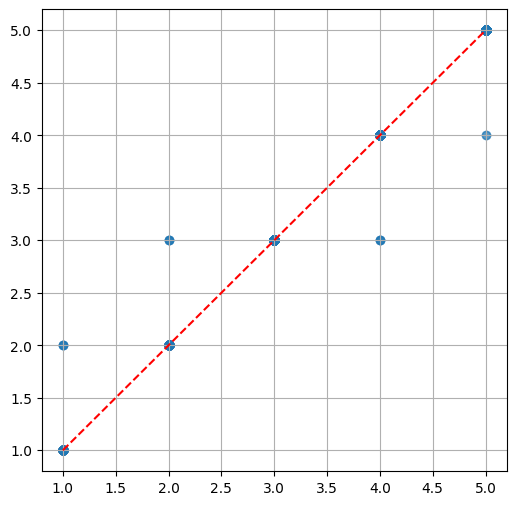

In [ ]:
#QQ plot
n = 1000
samples = discrete_acceptance_rejection(X_vals, P_X, n)
samples_sorted = np.sort(samples)

probs = (np.arange(1, n + 1) - 0.5) / n
cdf_theoretical = np.cumsum(P_X)

quantiles_theoretical = X_vals[np.searchsorted(cdf_theoretical, probs)]

plt.figure(figsize=(6,6))
plt.scatter(quantiles_theoretical, samples_sorted, alpha=0.5)
plt.plot([1, 5], [1, 5], 'r--')
plt.grid()

In [164]:
#Średnia i wariancja
n = 1000
samples = discrete_acceptance_rejection(X_vals, P_X, n)
E_X = np.sum(X_vals * P_X)
E_X2 = np.sum((X_vals**2)*P_X)
print("Średnia empiryczna: ", np.mean(samples))
print("Średnia teoretyczna: ", E_X)
print("Wariancja empiryczna: ", np.var(samples))
print("Wariancja teoretyczna: ", E_X2 - E_X**2)

Średnia empiryczna:  3.52
Średnia teoretyczna:  3.47
Wariancja empiryczna:  1.8235999999999999
Wariancja teoretyczna:  1.7691


## Zadanie 1b

In [39]:
def f(x):
    return (np.exp(-x/2)*x**2)/16

def acceptance_rejection(a, b, n):
    lambd = 0.2
    g = lambda x: lambd * np.exp(-lambd*x)

    x_vals = np.linspace(a, b, 1000)
    c = np.max(f(x_vals)/g(x_vals))

    samples = []
    while len(samples) < n:
        y = expon.rvs(scale=1/lambd)
        U = uniform.rvs(0, 1)
        if U <= f(y) / (c*g(y)):
            samples.append(y)
    return samples

samples = acceptance_rejection(0.01, 40, 1000)
print(samples)



[3.5602651948840403, 5.923079448019294, 1.2498268601777158, 6.258764531024679, 10.535007556254905, 3.3109972629002278, 11.6447565037091, 5.117110028747771, 5.134922067733838, 8.317002427390518, 5.240874539770738, 7.098986305357728, 3.573293745738579, 15.413819056032487, 4.193225645584199, 9.581481063060465, 5.143782763924223, 15.720091411242368, 8.033523826502742, 3.8813146329097914, 7.287529626685397, 6.065965612762777, 7.509570761029138, 7.424607222473986, 4.249700465960781, 3.2185608944588684, 4.642505133262889, 0.5822486919937692, 2.896264619162075, 5.211320010812961, 8.405109699251694, 1.6571651525188629, 8.600277908649975, 14.345641381996563, 7.774747508641648, 13.20653145960532, 2.4780570255620917, 3.5350247885825743, 2.241736304559785, 6.322084609499932, 1.7505480027523637, 13.129633042316025, 5.202820111875416, 12.376378769068307, 1.671993609904288, 4.620895248947867, 3.552739053392271, 10.10565691245632, 10.79517764582108, 4.099291785293067, 4.385094541473124, 5.6247117019280

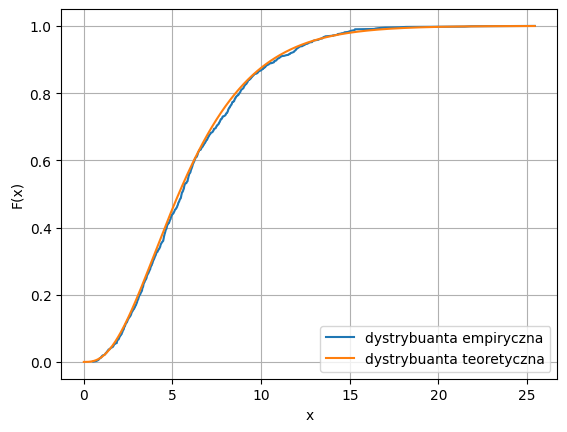

In [72]:
#Dystrybuanta empiryczna vs teoretyczna
samples = acceptance_rejection(0.01, 40, 1000)
ecdf = ECDF(samples)
x = np.linspace(0, np.max(samples), 500)
plt.plot(ecdf.x, ecdf.y, label='dystrybuanta empiryczna')
plt.plot(x, gamma.cdf(x, a=3, scale=2), label='dystrybuanta teoretyczna')
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid()
plt.legend()

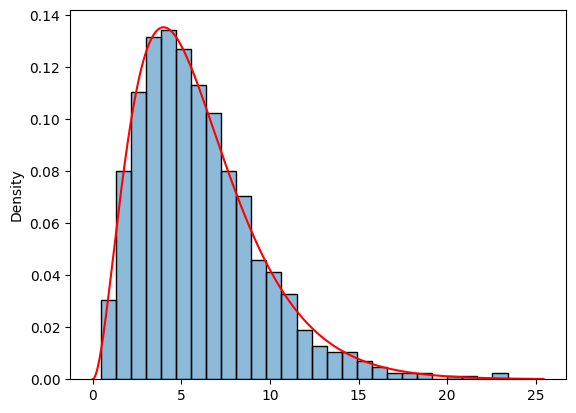

In [75]:
#Histogram i gęstość
samples = acceptance_rejection(0.01, 40, 1000)
sns.histplot(samples, stat='density', alpha=0.5)
plt.plot(x, f(x), color='red')

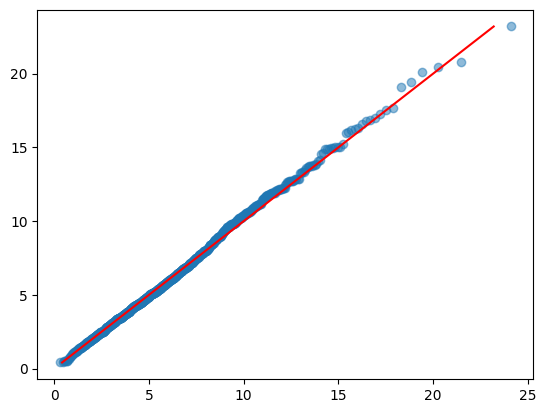

In [42]:
#QQ plot
n = 1000
samples = acceptance_rejection(0.01, 40, n)
samples_sorted = np.sort(samples)
probs = (np.arange(1, n + 1) - 0.5) / n
gamma_quantiles = gamma.ppf(probs, a=3, scale=2)

plt.scatter(gamma_quantiles, samples_sorted, alpha=0.5)
plt.plot(samples_sorted, samples_sorted, color='red')

In [43]:
#Średnia i wariancja
n = 1000
samples = acceptance_rejection(0.01, 40, n)

print("Średnia empiryczna: ", np.mean(samples))
print("Średnia teoretyczna: ", 3*2)
print("Wariancja empiryczna: ", np.var(samples))
print("Wariancja teoretyczna: ", 3*2*2)

Średnia empiryczna:  6.056065219433837
Średnia teoretyczna:  6
Wariancja empiryczna:  12.452550549867832
Wariancja teoretyczna:  12


## Zadanie 2a

In [44]:
def f2a(x):
    return (3/2)*(1-x**2)

def acceptance_rejection2a(a, b, n):
    g = (a+b)/2

    x_vals = np.linspace(a, b, n)
    c = np.max(f2a(x_vals)/g)

    samples = []
    while len(samples) < n:
        y = uniform.rvs(a, b)
        U = uniform.rvs(0, 1)
        if U <= f2a(y) / (c*g):
            samples.append(y)
    return samples



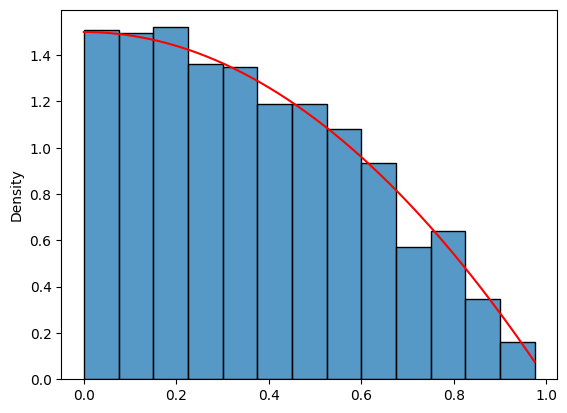

In [66]:
#Histogram gęstości
samples = acceptance_rejection2a(0, 1, 1000)
x = np.linspace(0, np.max(samples), 500)
sns.histplot(samples, stat='density')
plt.plot(x, f2a(x), color='red')


Text(0, 0.5, 'F(x)')

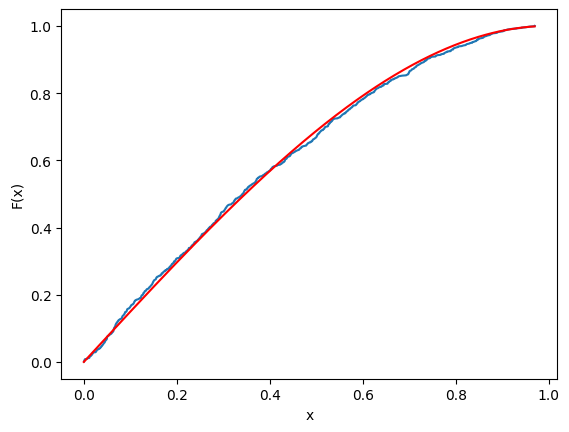

In [49]:
#Dystrybuanta
def F2a(x):
    result, _ = quad(f2a, 0, x)
    return result
samples = acceptance_rejection2a(0, 1, 1000)
ecdf = ECDF(samples)
x_vals = np.linspace(0, np.max(samples), 500)
theor_ecdf = [F2a(x) for x in x_vals]
plt.plot(ecdf.x, ecdf.y)
plt.plot(x_vals, theor_ecdf, color='red')
plt.xlabel('x')
plt.ylabel('F(x)')


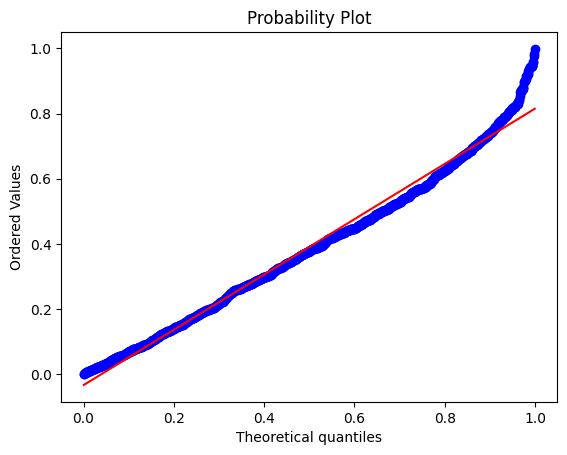

In [50]:
#QQ plot
samples = acceptance_rejection2a(0, 1, 1000)
probplot(samples, dist="uniform", plot=plt);

## Zadanie 2b

In [51]:
def f2b(x):
    return (3/2)*np.sin(x)*np.cos(x)**2

def acceptance_rejection2b(a, b, n):
    g = (a+b)/2

    x_vals = np.linspace(a, b, n)
    c = np.max(f2b(x_vals)/g)

    samples = []
    while len(samples) < n:
        y = uniform.rvs(a, b)
        U = uniform.rvs(0, 1)
        if U <= f2b(y) / (c*g):
            samples.append(y)
    return samples


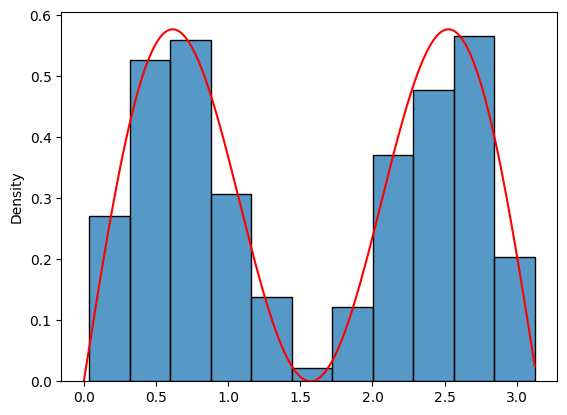

In [56]:
#Histogram gęstości
samples = acceptance_rejection2b(0, 3.14, 1000)
x = np.linspace(0, np.max(samples), 500)
sns.histplot(samples, stat='density')
plt.plot(x, f2b(x), color='red')

Text(0, 0.5, 'F(x)')

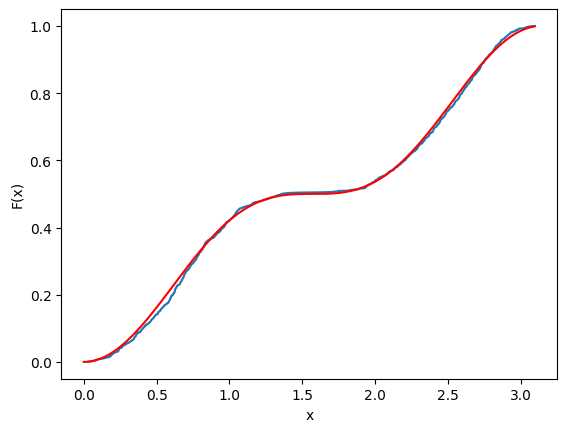

In [57]:
#Dystrybuanta
def F2b(x):
    result, _ = quad(f2b, 0, x)
    return result
samples = acceptance_rejection2b(0, 3.14, 1000)
x_vals = np.linspace(0, np.max(samples), 500)
ecdf = ECDF(samples)
theor_ecdf = [F2b(x) for x in x_vals]
plt.plot(ecdf.x, ecdf.y)
plt.plot(x_vals, theor_ecdf, color='red')
plt.xlabel('x')
plt.ylabel('F(x)')


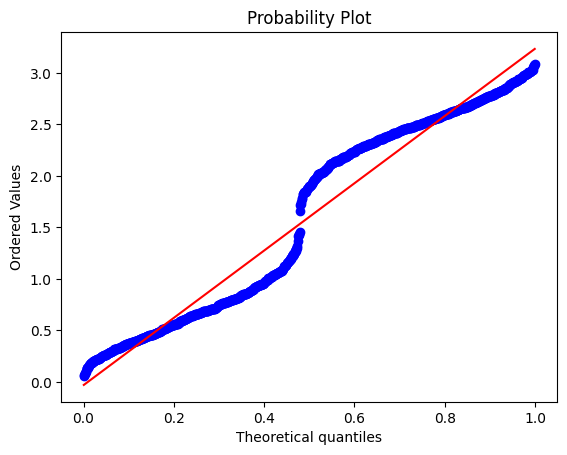

In [58]:
#QQ plot
samples = acceptance_rejection2b(0, 3.14, 1000)
probplot(samples, dist="uniform", plot=plt);

## Zadanie 2c

In [96]:
def f2c(x):
    return 2*np.sqrt(1/(2*3.14))*np.exp(-x**2/2)

def acceptance_rejection2c(a, b, n):
    lambd = 0.2
    g = lambda x: lambd * np.exp(-lambd*x)

    x_vals = np.linspace(a, b, n)
    c = np.max(f2c(x_vals)/g(x_vals))

    samples = []
    while len(samples) < n:
        y = expon.rvs(scale=1/lambd)
        U = uniform.rvs(0, 1)
        if U <= f2c(y) / (c*g(y)):
            samples.append(y)
    return samples

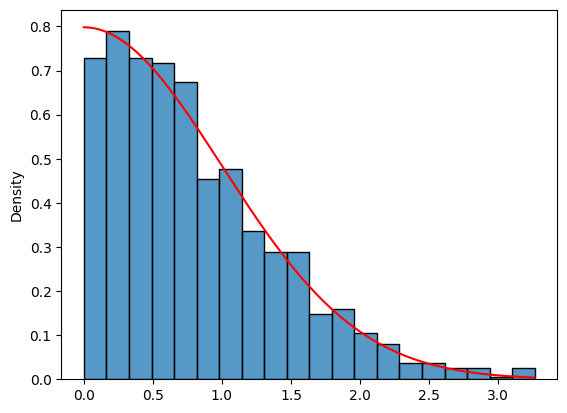

In [104]:
#Histogram gęstości
samples = acceptance_rejection2c(0, 20, 1000)
x = np.linspace(0, np.max(samples), 500)
sns.histplot(samples, stat='density')
plt.plot(x, f2c(x), color='red')

Text(0, 0.5, 'F(x)')

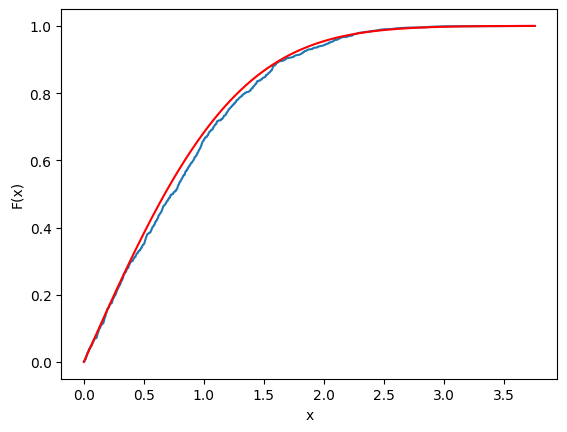

In [107]:
#Dystrybuanta
def F2c(x):
    result, _ = quad(f2c, 0, x)
    return result
samples = acceptance_rejection2c(0, 20, 1000)
x_vals = np.linspace(0, np.max(samples), 500)
ecdf = ECDF(samples)
theor_ecdf = [F2c(x) for x in x_vals]
plt.plot(ecdf.x, ecdf.y)
plt.plot(x_vals, theor_ecdf, color='red')
plt.xlabel('x')
plt.ylabel('F(x)')

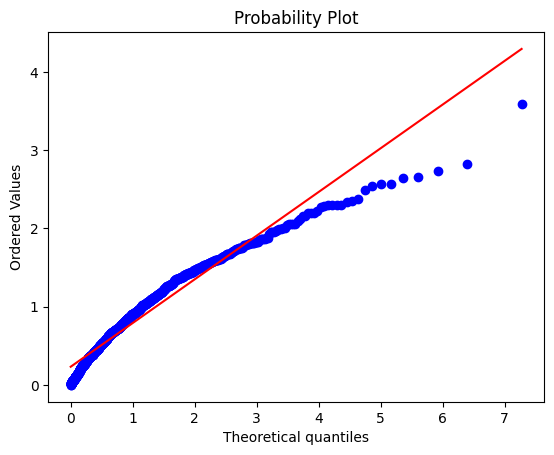

In [110]:
#QQ plot
samples = acceptance_rejection2c(0, 20, 1000)
probplot(samples, dist="expon", plot=plt);

## Zadanie 3

<Axes: ylabel='Count'>

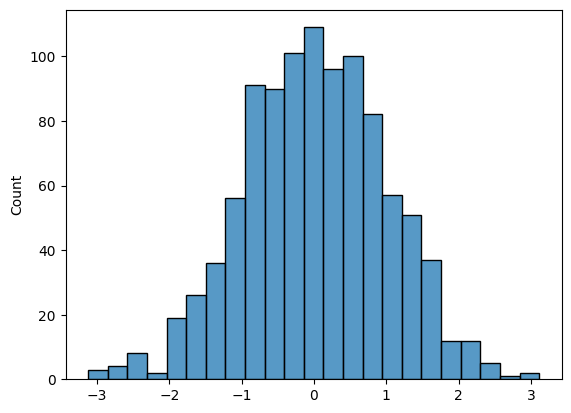

In [78]:
def X(u1, u2):
    return np.sqrt(-2*np.log(u1))*np.cos(2*3.14*u2)

def Y(u1, u2):
    return np.sqrt(-2*np.log(u1))*np.sin(2*3.14*u2)

def box_muller(n):
    x_vals = []
    y_vals = []
    for i in range(n):
        u1 = uniform.rvs(0, 1)
        u2 = uniform.rvs(0, 1)
        x_vals.append(X(u1, u2))
        y_vals.append(Y(u1, u2))
    return x_vals, y_vals

a = box_muller(1000)
sns.histplot(a[0])


## Zadanie 4 

<Axes: ylabel='Count'>

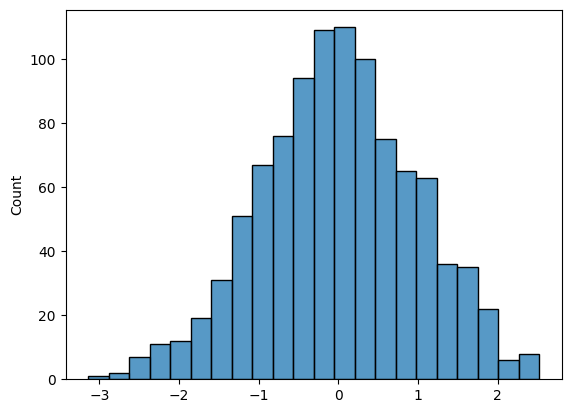

In [86]:
def Z(u, r):
    return u*np.sqrt(-2*np.log(r)/r)

def bg_box_muller(n):
    x_vals = []
    y_vals = []
    while len(x_vals) < n:
        u1 = uniform.rvs(-1, 2)
        u2 = uniform.rvs(-1, 2)
        r = u1**2 + u2**2
        if r <= 1:
            x_vals.append(Z(u1, r))
            y_vals.append(Z(u2, r))
    return x_vals, y_vals

a = bg_box_muller(1000)
sns.histplot(a[1])

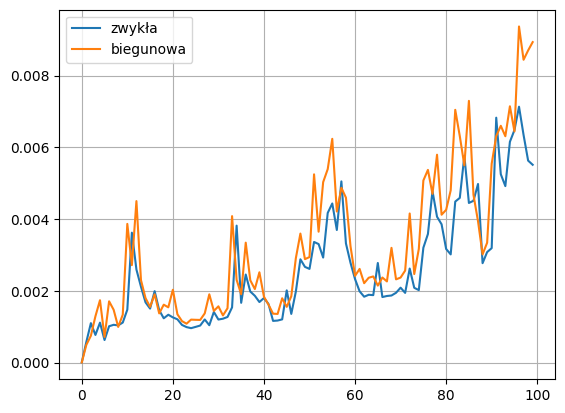

In [132]:
#Porównanie czasu działania funkcji
time_box_muller = []
time_bg_box_muller = []
n = 100
for i in range(n):
    time_box_muller.append(timeit.timeit('box_muller(i)', globals=globals(), number=1))
    time_bg_box_muller.append(timeit.timeit('bg_box_muller(i)', globals=globals(), number=1))

plt.plot(time_box_muller, label='zwykła')
plt.plot(time_bg_box_muller, label='biegunowa')
plt.legend()
plt.grid()

## Zadanie 5

In [2]:
def cholesky(E):
    n = E.shape[0]
    A = np.zeros_like(E)
    s = 0
    
    for i in range(n):
        for j in range(i+1):
            for k in range(j):
                s += A[i][k] * A[j][k]
            if i==j:
                A[i][j] = np.sqrt(E[i][i]-s)
            else:
                A[i][j] = (1/A[j][j] * (E[i][j] - s))
    return A

[[ 2.3630747   0.06035934 -0.22863185 ... -0.42336194  1.35540245
   0.63010603]
 [-0.32160522  0.69322949 -0.28937744 ... -0.68084924  0.29331331
   1.5669118 ]]


Text(0, 0.5, 'Y')

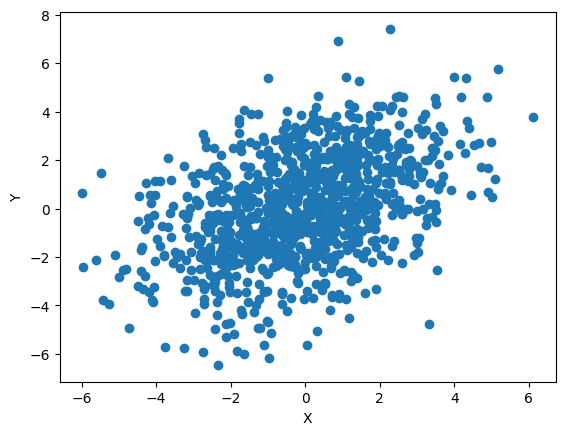

In [3]:
n = 1000
z = norm.rvs(0, 1, n)


E = np.array([[4, 3], [3, 9]])
A = cholesky(E)
z = np.random.randn(E.shape[0], n)
print(z)

samples = A @ z

plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')


[[ 1.12254358 -0.68428407 -0.8173198  ... -0.65636963 -1.24785959
   0.87516555]
 [-0.21081322 -1.4511565   0.19228757 ... -0.99549404  0.3326274
   2.03214552]
 [ 0.24613799 -0.68515767 -0.76082408 ...  1.60483861  0.54650903
  -0.15527632]]


Text(0.5, 0, 'Z')

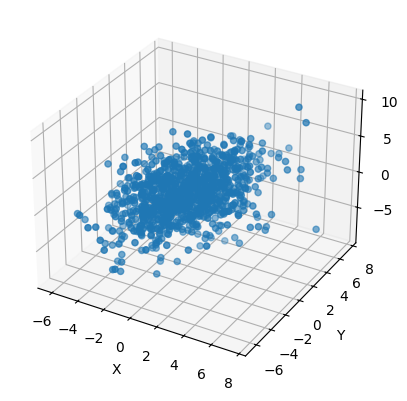

In [4]:
n = 1000
z = norm.rvs(0, 1, n)


E = np.array([[4, 2, 3], [2, 9, 1], [3, 1, 16]])
A = cholesky(E)
z = np.random.randn(E.shape[0], n)
print(z)

samples = A @ z
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[0], samples[1], samples[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')